#  Laboratory Task 4
## Machine Learning Technologies

**ITMO university. 1st semester**

Performed by: Gleb Mikloshevich

Group: J4132C

---

Course: MLT September

Lecturer: Petr Gladilin



### Imports

In [ ]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, log_loss, roc_curve, precision_recall_curve, f1_score, classification_report

import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Data loading

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bioresponse.csv')

In [ ]:
print(f"rows: {len(data)}")
print(f"cols: {len(data.columns)}")
data.head()

rows: 3751
cols: 1777


Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 1777 columns]

In [ ]:
data.describe()

Activity           D1           D2           D3           D4  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.542255     0.076948     0.592436     0.068142     0.038990   
std       0.498278     0.079989     0.105860     0.078414     0.115885   
min       0.000000     0.000000     0.282128     0.000000     0.000000   
25%       0.000000     0.033300     0.517811     0.000000     0.000000   
50%       1.000000     0.066700     0.585989     0.050000     0.000000   
75%       1.000000     0.100000     0.668395     0.100000     0.000000   
max       1.000000     1.000000     0.964381     0.950000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  ...   
mean      0.212112     0.686653     0.274713     0.455133     0.749517  ...   
std       0.102592     0.078702     0.090017     0.162731     0.071702  ...   
min       0.002630     0.137873     0.006130     0.000000     0.275590  ...   
25%       0.138118     0.625627     0.207374     0.378062     0.707339  ...   
50%       0.190926     0.674037     0.277845     0.499942     0.738961  ...   
75%       0.261726     0.740663     0.335816     0.569962     0.788177  ...   
max       1.000000     0.994735     0.790831     0.989870     1.000000  ...   

             D1767        D1768        D1769        D1770        D1771  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.026926     0.014663     0.013863     0.021861     0.015196   
std       0.161889     0.120215     0.116938     0.146249     0.122348   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             D1772        D1773        D1774        D1775        D1776  
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  
mean      0.016796     0.012263     0.011730     0.020261     0.011197  
std       0.128522     0.110074     0.107683     0.140911     0.105236  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 1777 columns]

In [ ]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]
print(X.shape)
print(y.shape)

(3751, 1776)
(3751,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2813, 1776) (2813,)
(938, 1776) (938,)


## Code

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b

In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X.T)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X.T,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

### Gradient descent

In [ ]:
# optimize

def optimize_gd(w, b, X, Y, num_iterations: int = 10000,
                learning_rate: float = 1e-3, print_cost: float = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

### Gradient descent with momentum

In [36]:
# optimize

def optimize_gdm(w, b, X, Y, beta: float = 0.9, num_iterations: float = 0.9,
                 learning_rate: float = 1e-3, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent with momentum algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    beta -- scalar value of momentum parameter
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []
    momentum_w = np.zeros_like(w)
    momentum_b = 0.

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule
        momentum_w = beta * momentum_w - learning_rate*dw
        momentum_b = beta * momentum_b - learning_rate*db

        w += momentum_w
        b += momentum_b


        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

### Adam

In [13]:
# optimize

def optimize_adam(w, b, X, Y, num_iterations, learning_rate: float,
                  print_cost:bool = False, b1: float=0.9, b2: float=0.999):
    """
    This function optimizes w and b by running am adam algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the adam update rule
    b1 -- b1 coefficient
    b2 -- b2 coefficient
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []
    sw, sb = 0, 0
    rw, rb = 0, 0
    num_stubilizer: float = 1e-8 # constant for numerical stabilization

    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        if math.isnan(cost):
            break
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        sw = b1*sw + (1. - b1) * dw
        rw = b2*rw + (1. - b2) * dw**2
        cor_sw = sw / (1. - b1**(i+1))
        cor_rw = rw / (1. - b2**(i+1))

        sb = b1*sb + (1. - b1) * db
        rb = b2*rb + (1. - b2) * db**2
        cor_sb = sb / (1. - b1**(i+1))
        cor_rb = rb / (1. - b2**(i+1))

        # update rule
        w -= learning_rate * cor_sw / (np.sqrt(cor_rw) + num_stubilizer)
        b -= learning_rate * cor_sb / (np.sqrt(cor_rb) + num_stubilizer)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [17]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[0]
    Y_prediction = np.zeros((1,m))

    w = w.reshape(X.shape[1], 1)

    # Compute vector "A" predicting the probabilities

    A = sigmoid(np.dot(w.T,X.T)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction.T

## Training

### Gradient descent

In [37]:
w, b = initialize_with_zeros(X_train.shape[1])
params_gd, grads_gd, costs_gd = optimize_gd(w, b, X_train.to_numpy(), y_train.to_numpy(), num_iterations= 10000, learning_rate = 0.005, print_cost = False)

In [19]:
predictions_gd = predict(params_gd["w"], params_gd["b"], X_test)
print(classification_report(y_test.to_numpy(), predictions_gd))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       403
           1       0.79      0.81      0.80       535

    accuracy                           0.77       938
   macro avg       0.77      0.76      0.76       938
weighted avg       0.77      0.77      0.77       938



### Gradient descent with momentum

In [38]:
w, b = initialize_with_zeros(X_train.shape[1])
params_gdm, grads_gdm, costs_gdm = optimize_gdm(w, b, X_train.to_numpy(), y_train.to_numpy(), num_iterations= 10000, learning_rate = 0.005, print_cost = False)

In [44]:
predictions_gdm = predict(params_gdm["w"], params_gdm["b"], X_test)
print(classification_report(y_test.to_numpy(), predictions_gdm))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       403
           1       0.78      0.79      0.79       535

    accuracy                           0.76       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.76      0.76      0.76       938



### Adam

In [51]:
adam_b1_coefs = [0.9, 0.9, 0.65, 0.9, 0.95, 0.8, 0.7]
adam_b2_coefs = [0.999, 0.999, 0.999, 0.95, 0.999, 0.99, 0.95]
adam_lr_coefs = [5e-4, 1e-3, 5e-3, 1e-3, 5e-3, 5e-3, 5e-3]

In [52]:
costs_results_adam = []
params_results_adam = []
for b1, b2, lr in zip (adam_b1_coefs, adam_b2_coefs, adam_lr_coefs):
    w, b = initialize_with_zeros(X_train.shape[1])
    params_adam, grads_adam, costs_adam = optimize_adam(w, b, X_train.to_numpy(), y_train.to_numpy(), num_iterations= 3500, learning_rate =lr, print_cost = False, b1=b1, b2=b2)
    costs_results_adam.append(costs_adam)
    params_results_adam.append(params_adam)

<ipython-input-11-0879a3287b11>:23: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
<ipython-input-11-0879a3287b11>:23: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


In [57]:
for i in range(len(adam_b1_coefs)):
    print(f"Adam optimizer b1: {adam_b1_coefs[i]}, b2: {adam_b2_coefs[i]}, lr: {adam_lr_coefs[i]}")
    print(f"Iterations: {len(costs_results_adam[i])}")
    predictions_adam = predict(params_results_adam[i]["w"], params_results_adam[i]["b"], X_test)
    accuracy = accuracy_score(y_test, predictions_adam)
    f1 = f1_score(y_test, predictions_adam)
    print(f"f1: {f1}")
    print(f"accuracy: {accuracy}", end="\n\n")

# predictions_adam = predict(params_adam["w"], params_adam["b"], X_test)
# print(classification_report(y_test.to_numpy(), predictions_adam))

Adam optimizer b1: 0.9, b2: 0.999, lr: 0.0005
Iterations: 35
f1: 0.7869158878504674
accuracy: 0.7569296375266524

Adam optimizer b1: 0.9, b2: 0.999, lr: 0.001
Iterations: 35
f1: 0.7827715355805245
accuracy: 0.7526652452025586

Adam optimizer b1: 0.65, b2: 0.999, lr: 0.005
Iterations: 19
f1: 0.7785843920145191
accuracy: 0.7398720682302772

Adam optimizer b1: 0.9, b2: 0.95, lr: 0.001
Iterations: 20
f1: 0.7808988764044943
accuracy: 0.7505330490405118

Adam optimizer b1: 0.95, b2: 0.999, lr: 0.005
Iterations: 19
f1: 0.774133083411434
accuracy: 0.7430703624733476

Adam optimizer b1: 0.8, b2: 0.99, lr: 0.005
Iterations: 11
f1: 0.7766258246936851
accuracy: 0.7473347547974414

Adam optimizer b1: 0.7, b2: 0.95, lr: 0.005
Iterations: 9
f1: 0.7764265668849392
accuracy: 0.7452025586353944



In [58]:
predictions_adam = predict(params_results_adam[0]["w"], params_results_adam[0]["b"], X_test)
print(classification_report(y_test.to_numpy(), predictions_adam))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       403
           1       0.79      0.79      0.79       535

    accuracy                           0.76       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.76      0.76      0.76       938



## Conclusions

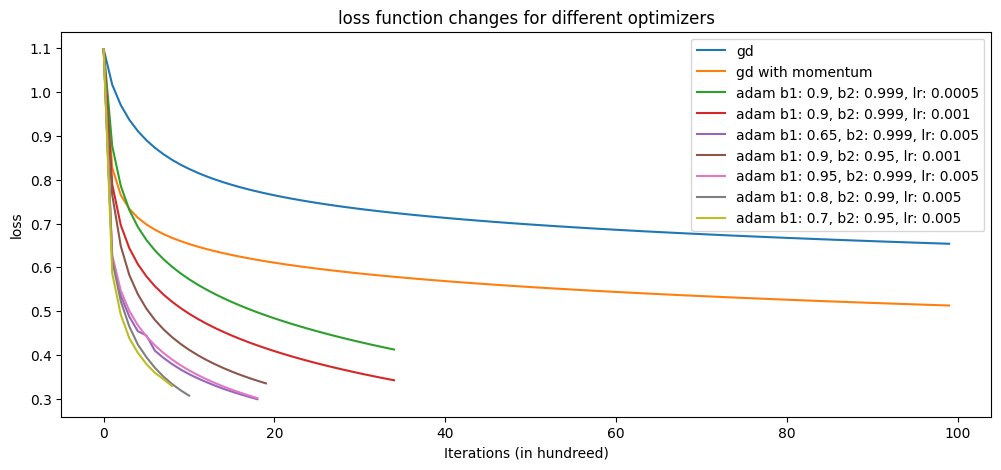

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(costs_gd, label="gd")
plt.plot(costs_gdm, label="gd with momentum")

for i in range(len(adam_b1_coefs)):
    label = f"adam b1: {adam_b1_coefs[i]}, b2: {adam_b2_coefs[i]}, lr: {adam_lr_coefs[i]}"
    plt.plot(costs_results_adam[i], label=label)

plt.xlabel("Iterations (in hundreed)")
plt.ylabel("loss")
plt.title("loss function changes for different optimizers")
plt.legend(loc="best")
plt.show()

|          | gd   | momentum | adam |
|----------|------|----------|------|
| f1       | 0.80 | 0.79     | 0.79 |
| accuracy | 0.77 | 0.76     | 0.76 |

As we can see in the plot above, Adam optimizer conjugated with a faster pace and better values. Adam optimizers has shown robustness to hyperparameters chage. Although the loss function and convergence rate differ, the results are similar. On inference, f1-score and accuracy were similar.